In [4]:
import matplotlib.pyplot as plt
import uproot

df = uproot.open('B2JpsiK0s.root:tree').arrays(['Mbc','isSignal','M',
                                                'roeM__bo__bc', 'roeM__bomy_mask__bc', 
                                                'nROE_Charged__bo__bc', 'nROE_Charged__bomy_mask__bc',
                                                'Jpsi_M', 'Jpsi_M_uncorrected', 'Jpsi_isSignal',
                                                'rnd','deltaE_rnk','__ncandidates__',
                                                'FBDT_qrCombined','qrMC',
                                                'Jpsi_dz', 'Jpsi_mcDecayVertexZ', 'Jpsi_chiProb'
                                                ], library='pd')

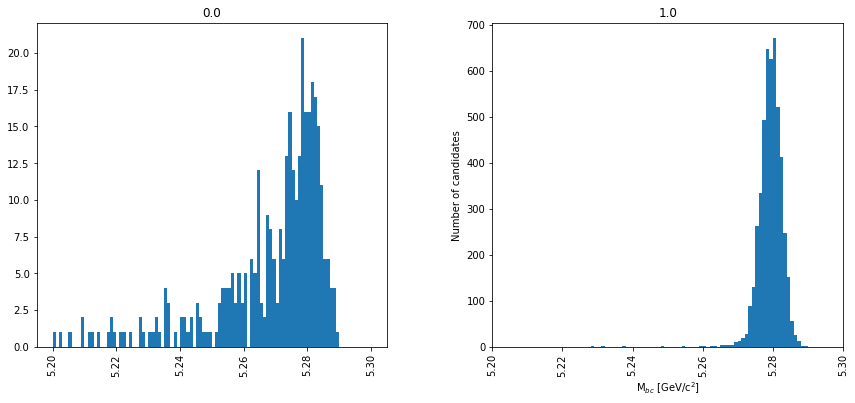

In [2]:
df.hist('Mbc', bins=100, range=(5.2, 5.3), by='isSignal', figsize=(14.0, 6.0))
plt.xlabel(r'M$_{bc}$ [GeV/c$^{2}$]')
plt.ylabel('Number of candidates')
plt.xlim(5.2, 5.3)
plt.style.use("belle2")
plt.savefig('Mbc_all.png')

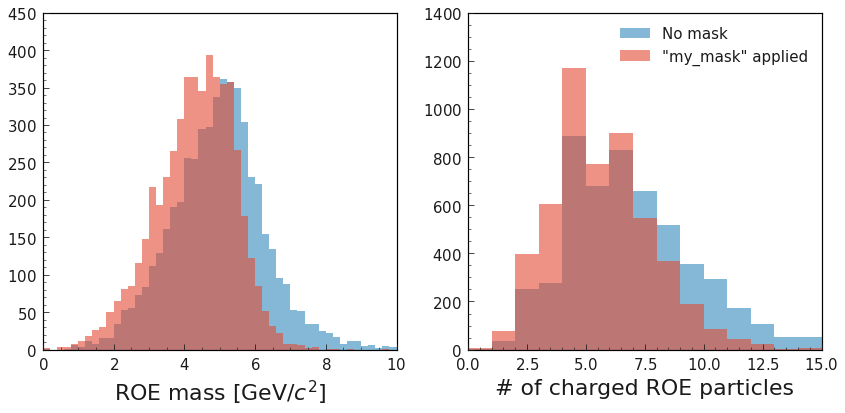

In [3]:
# df.query("isSignal==0").hist('Mbc', bins=100, range=(4.3, 5.3))
fig, ax = plt.subplots(1,2, figsize=(12, 6))

m_range = (0, 10)
ax[0].hist(df['roeM__bo__bc'], label='"my_mask" applied', bins=50, range=m_range, alpha=0.6)
ax[0].hist(df['roeM__bomy_mask__bc'], label='No mask', bins=50, range=m_range, alpha=0.6)
ax[0].set_xlim(m_range)
ax[0].set_xlabel('ROE mass [GeV/$c^2$]')

m_range = (0, 15)
ax[1].hist(df['nROE_Charged__bo__bc'], label='No mask', bins = 15, range=m_range, alpha=0.6)
ax[1].hist(df['nROE_Charged__bomy_mask__bc'], label='"my_mask" applied',bins = 15, range=m_range, alpha=0.6)
ax[1].set_xlim(m_range)
ax[1].set_xlabel('# of charged ROE particles')
ax[1].legend()

fig.tight_layout()
fig.savefig('roe_mask_comparison.svg')

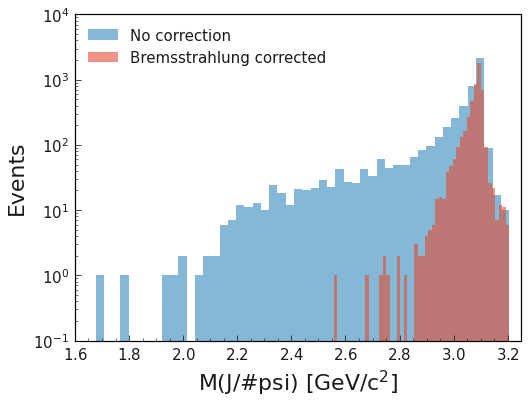

In [50]:
import matplotlib as mpl

mpl.use("Agg")
plt.style.use("belle2")

fig, ax = plt.subplots(figsize=(8, 6))

range_Jpsi = (1.6, 3.25)

df_isSignal = df.query("Jpsi_isSignal==1")
df_wBCS = df.query("Jpsi_isSignal==1 and deltaE_rnk==1")

ax.hist(df_wBCS["Jpsi_M_uncorrected"], label='No correction', alpha=0.6, bins=50)
ax.hist(df_wBCS["Jpsi_M"], label='Bremsstrahlung corrected', alpha=0.6, bins=50)
ax.set_xlim(range_Jpsi)
ax.set_yscale("log")
ax.set_xlabel(r'M(J/#psi) [GeV/c$^{2}$]')
ax.set_ylabel('Events')
ax.legend()

plt.savefig('M_Jpsi.png')

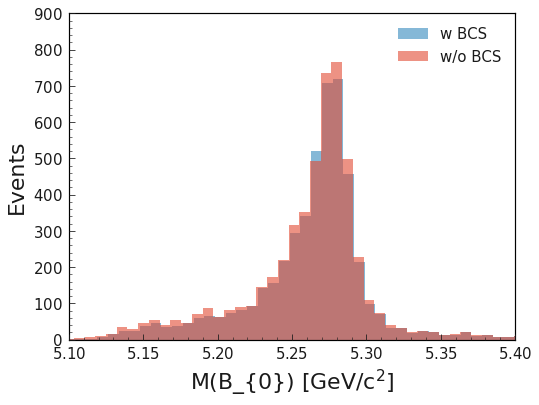

In [51]:
mpl.use("Agg")
plt.style.use("belle2")

fig, ax = plt.subplots(figsize=(8, 6))

range_Jpsi = (5.1, 5.4)

df_wBCS = df.query("deltaE_rnk==1")

ax.hist(df_wBCS["M"], label='w BCS', alpha=0.6, bins=50)
ax.hist(df["M"], label='w/o BCS', alpha=0.6, bins=50)
ax.set_xlim(range_Jpsi)
ax.set_xlabel(r'M(B_{0}) [GeV/c$^{2}$]')
ax.set_ylabel('Events')
ax.legend()

plt.savefig('M_Jpsi.png')

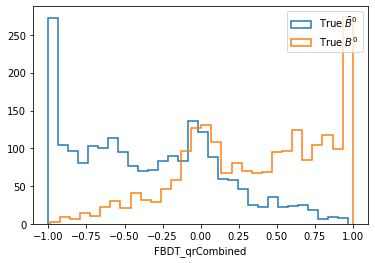

In [3]:
fig, ax = plt.subplots()
ax.hist(
    df.query("qrMC == -1.")["FBDT_qrCombined"],
    histtype="step",
    linewidth=1.5,
    label=r"True $\bar B^0$",
    bins=30,
)
ax.hist(
    df.query("qrMC == 1.")["FBDT_qrCombined"],
    histtype="step",
    linewidth=1.5,
    label=r"True $B^0$",
    bins=30,
)
ax.set_xlabel("FBDT_qrCombined")
ax.legend()
fig.savefig("flavor_tags.svg")

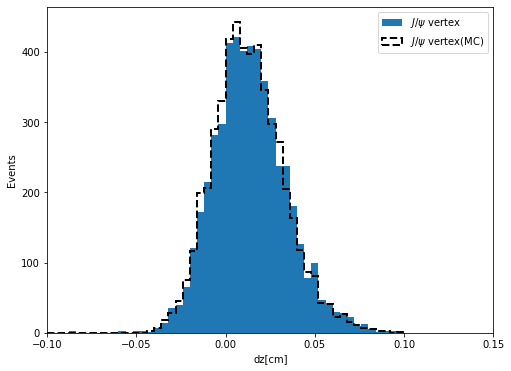

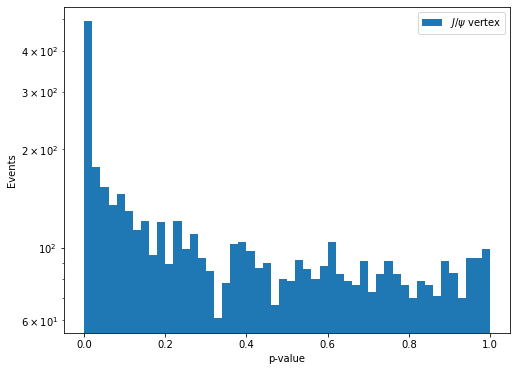

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
m_range = [-0.1, 0.1]
ax.set_xlim(left=-0.1, right=0.15)
ax.hist(df["Jpsi_dz"], bins=50, range=m_range, label=r"$J/\psi$ vertex")
ax.hist(
    df["Jpsi_mcDecayVertexZ"],
    histtype="step",
    lw=2,
    color="black",
    linestyle="--",
    bins=50,
    range=m_range,
    label=r"$J/\psi$ vertex(MC)",
)
ax.set_xlabel("dz[cm]")
ax.set_ylabel("Events")
ax.legend()
fig.savefig("vertex_jpsi_dz.svg")

# P-value

fig, ax = plt.subplots(figsize=(8, 6))
m_range = [0, 1]
ax.set_xlim(left=-0.05, right=1.05)
ax.hist(
    df["Jpsi_chiProb"],
    bins=50,
    range=m_range,
    label=r"$J/\psi$ vertex",
)
ax.set_yscale("log")  # set a logarithmic scale in the y-axis
ax.set_xlabel("p-value")
ax.set_ylabel("Events")
ax.legend()
fig.savefig("vertex_pValue.svg")